<a href="https://colab.research.google.com/github/hmzashh/Deep-Learning/blob/main/Bank%20Marketing%20Campaign%20-%20MLP%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Marketing Campaign - MLP Classifier

This project is a deep learning solution using a **Multilayer Perceptron (MLP)** to predict whether a client will subscribe to a term deposit product based on personal and marketing data, using the [Bank Marketing dataset](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing).

---

#Project Summary

- **Goal:** Predict the likelihood of a client subscribing to a bank's term deposit.
- **Model Used:** MLP (Multilayer Perceptron) built using TensorFlow and Keras.
- **Dataset Size:** 41,176 rows × 21 columns
- **Accuracy Achieved:** ✅ **91.4% on test set**

---

#Technologies Used

- Python
- TensorFlow / Keras
- NumPy, Pandas
- Scikit-learn
- Matplotlib

---

# Dataset Overview

- Source: UCI Bank Marketing Dataset
- Columns include: age, job, marital status, education, default, housing loan, contact type, month, duration, campaign info, etc.
- Target variable: `y` → `yes` / `no` (converted to 1 / 0)

1. رفع البيانات إلى Google Colab


In [8]:
from google.colab import files
uploaded = files.upload()


Saving bank-additional-full.csv to bank-additional-full.csv


✅ 2. استيراد المكتبات الأساسية



In [45]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping



✅ 3. قراءة البيانات



In [46]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head(10)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [47]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [49]:
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le


y = df['y']

le_y = LabelEncoder()
y = le_y.fit_transform(y)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  int64  
 2   marital         41176 non-null  int64  
 3   education       41176 non-null  int64  
 4   default         41176 non-null  int64  
 5   housing         41176 non-null  int64  
 6   loan            41176 non-null  int64  
 7   contact         41176 non-null  int64  
 8   month           41176 non-null  int64  
 9   day_of_week     41176 non-null  int64  
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  int64  
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

✅ 4. تجهيز الميزات (X) والتصنيفات (y)

*   على فرض ان الداتا لا تحتاج اي معالجة مسبقة كالقيم المفقودة والمتطرفة وان اصناف البيانات متوازن وغيرها من الامور




In [51]:
X = df.drop('y', axis=1).values
y = df['y'].values


✅ 5. تقسيم البيانات وتوحيد القيم

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)



✅ 6. بناء شبكة عصبية تقليدية


In [64]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),

    Dense(32, activation='relu'),
    BatchNormalization(),


    Dense(1, activation='sigmoid')
])


✅ 7. تجميع النموذج



In [65]:
model.compile(
    optimizer=Adam(learning_rate=0.005),
    loss='binary_crossentropy' if len(np.unique(y)) == 2 else 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)


✅ 8. تدريب النموذج



In [66]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.1,
    #callbacks=[early_stop],
    verbose=1
)


Epoch 1/30
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8843 - loss: 0.2726 - val_accuracy: 0.9022 - val_loss: 0.2146
Epoch 2/30
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9064 - loss: 0.2033 - val_accuracy: 0.9013 - val_loss: 0.2085
Epoch 3/30
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9077 - loss: 0.1981 - val_accuracy: 0.9019 - val_loss: 0.2057
Epoch 4/30
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9082 - loss: 0.1968 - val_accuracy: 0.9065 - val_loss: 0.2042
Epoch 5/30
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9134 - loss: 0.1879 - val_accuracy: 0.9019 - val_loss: 0.2087
Epoch 6/30
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9128 - loss: 0.1871 - val_accuracy: 0.9044 - val_loss: 0.2009
Epoch 7/30
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9131 - loss: 0.1866 - val_accuracy: 0.9032 - val_loss: 0.1994
Epoch 8/30
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9134 - loss: 0.1847 

✅ 9. تقييم النموذج



In [67]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2f}")


258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9164 - loss: 0.1883
Test Accuracy: 0.91


✅ 10. رسم الأداء



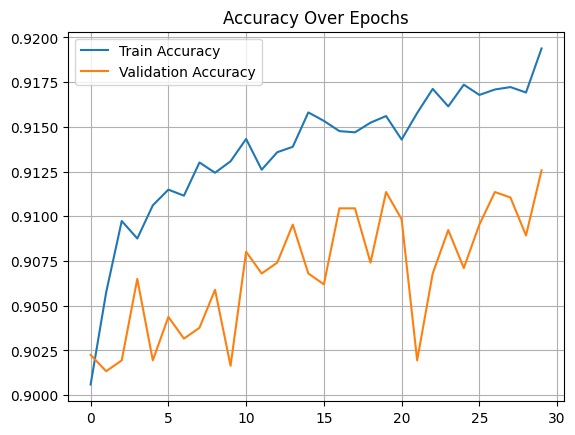

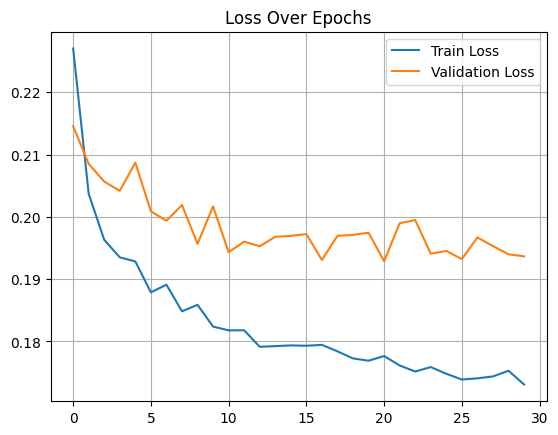

In [68]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Over Epochs")
plt.grid(True)
plt.show()


In [71]:
preds = model.predict(X_test[:15])
predicted_classes = (preds > 0.5).astype(int)

print(" التوقعات:", predicted_classes.flatten())
print(" القيم الحقيقية:", y_test[:15])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
 التوقعات: [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 القيم الحقيقية: [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
